# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Reading the Dataset

In [2]:
df = pd.read_csv('LiverDiseasePred.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Naming the Columns

In [3]:
df.columns=['Age','Gender','Total_Bilirubin','Direct_Bilirubin', 'Alkphos_Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Result']
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Data Analysis

In [4]:
df.shape      # 583 rows & 11 Columns

(583, 11)

In [5]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
df.describe(include = object)

,Gender
count,583
unique,2
top,Male
freq,441


In [7]:
df.Result.unique()

array([1, 2], dtype=int64)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Total_Bilirubin'}>,
        <AxesSubplot:title={'center':'Direct_Bilirubin'}>],
       [<AxesSubplot:title={'center':'Alkphos_Alkaline_Phosphotase'}>,
        <AxesSubplot:title={'center':'Alamine_Aminotransferase'}>,
        <AxesSubplot:title={'center':'Aspartate_Aminotransferase'}>],
       [<AxesSubplot:title={'center':'Total_Protiens'}>,
        <AxesSubplot:title={'center':'Albumin'}>,
        <AxesSubplot:title={'center':'Albumin_and_Globulin_Ratio'}>],
       [<AxesSubplot:title={'center':'Result'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

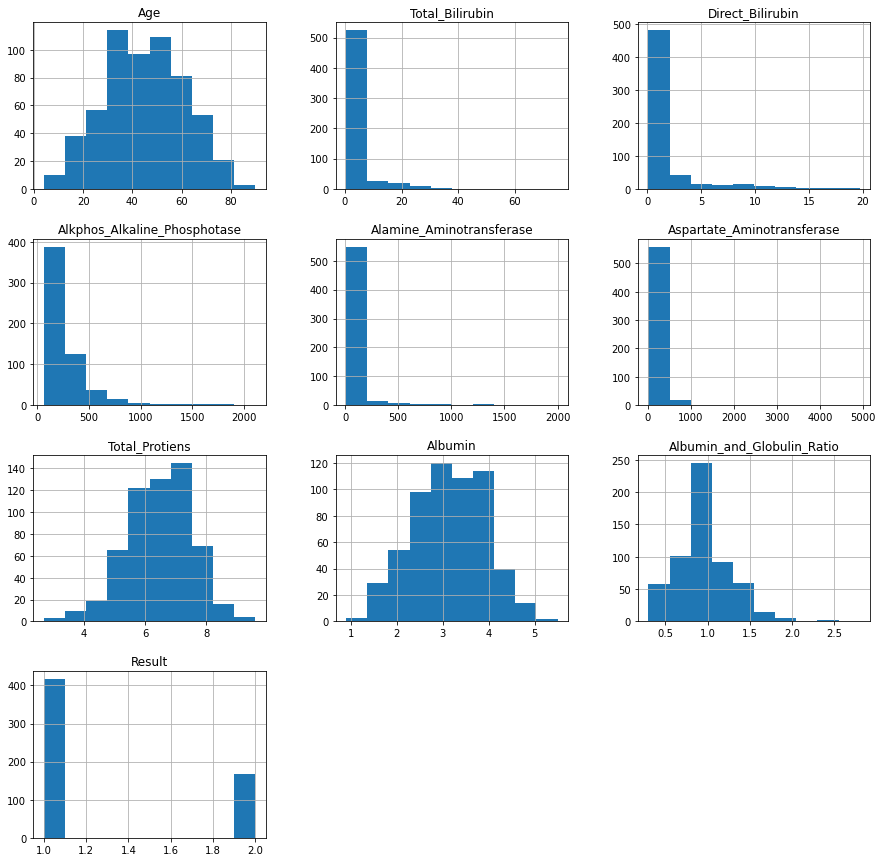

In [8]:
df.hist(figsize = (15,15))  # People between the age of 30 - 55 are the most affected with liver disease

Text(0.5, 0.98, 'Analysis based on Gender & Age')

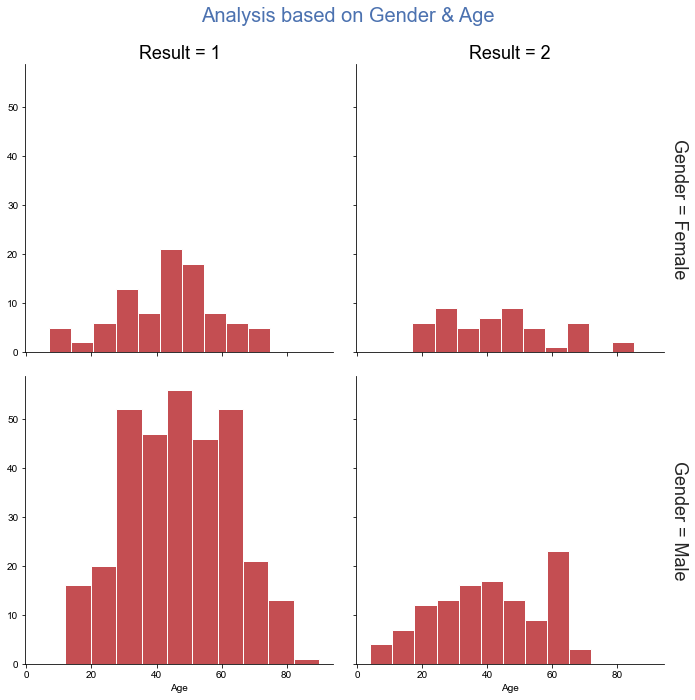

In [9]:
analyze = sb.FacetGrid(df, col = 'Result', row = 'Gender', height = 5, margin_titles = True)
sb.set(font_scale = 1.5)
analyze.map(plt.hist, 'Age', color = 'r')
plt.subplots_adjust(top = 0.9)
analyze.fig.suptitle('Analysis based on Gender & Age', fontsize = 20, color = 'b')

##### From the above plots
- Result 1 represents - Liver disease & 2 - No Liver disease
- Males are more vulnerable to the disease
- People between the age 30 - 65 are most affected by the disease
- Dataset contains data of more people with liver disease

In [11]:
df.Result.value_counts()                  # 1 - Liver disease, 2 - No liver disease

1    416
2    167
Name: Result, dtype: int64

In [12]:
en = LabelEncoder()

df.Gender = en.fit_transform(df.Gender)
df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [13]:
df.Gender.value_counts()                    # 0 - Female, 1 - Male

1    441
0    142
Name: Gender, dtype: int64

# Check for the Datatypes

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           583 non-null    int64  
 1   Gender                        583 non-null    int32  
 2   Total_Bilirubin               583 non-null    float64
 3   Direct_Bilirubin              583 non-null    float64
 4   Alkphos_Alkaline_Phosphotase  583 non-null    int64  
 5   Alamine_Aminotransferase      583 non-null    int64  
 6   Aspartate_Aminotransferase    583 non-null    int64  
 7   Total_Protiens                583 non-null    float64
 8   Albumin                       583 non-null    float64
 9   Albumin_and_Globulin_Ratio    579 non-null    float64
 10  Result                        583 non-null    int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 47.9 KB


# Data Preprocessing

## Check for Null values

In [15]:
df.isnull().sum()

Age                             0
Gender                          0
Total_Bilirubin                 0
Direct_Bilirubin                0
Alkphos_Alkaline_Phosphotase    0
Alamine_Aminotransferase        0
Aspartate_Aminotransferase      0
Total_Protiens                  0
Albumin                         0
Albumin_and_Globulin_Ratio      4
Result                          0
dtype: int64

### Filling the null values with mean

In [16]:
mean = df['Albumin_and_Globulin_Ratio'].mean()
df['Albumin_and_Globulin_Ratio'].fillna(mean, inplace = True)
print('Mean value of Albumin and Globulin Ratio :',mean)

Mean value of Albumin and Globulin Ratio : 0.9470639032815201


In [17]:
df.isnull().sum()

Age                             0
Gender                          0
Total_Bilirubin                 0
Direct_Bilirubin                0
Alkphos_Alkaline_Phosphotase    0
Alamine_Aminotransferase        0
Aspartate_Aminotransferase      0
Total_Protiens                  0
Albumin                         0
Albumin_and_Globulin_Ratio      0
Result                          0
dtype: int64

In [18]:
df.isnull().values.any()

False

## Check for Outliers

<AxesSubplot:>

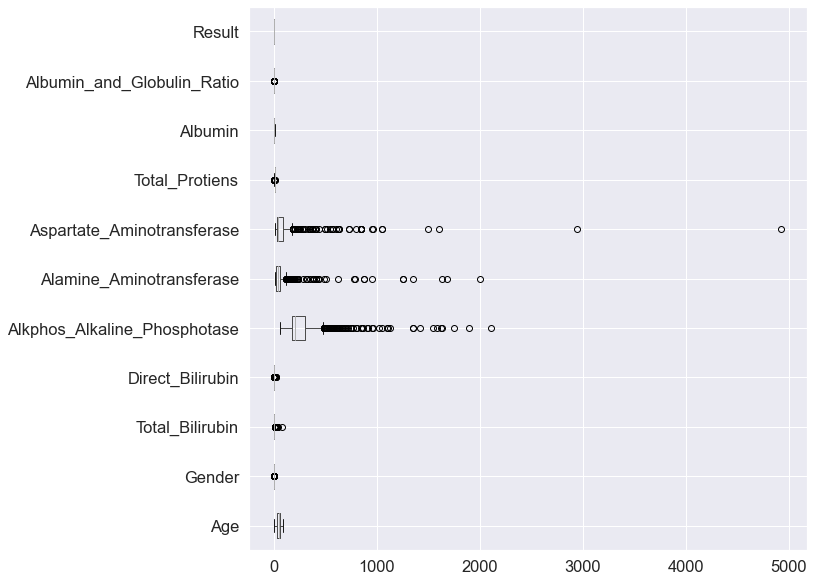

In [19]:
df.boxplot(figsize = (10,10), vert = False)

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Age                              25.0
Gender                            0.0
Total_Bilirubin                   1.8
Direct_Bilirubin                  1.1
Alkphos_Alkaline_Phosphotase    122.5
Alamine_Aminotransferase         37.5
Aspartate_Aminotransferase       62.0
Total_Protiens                    1.4
Albumin                           1.2
Albumin_and_Globulin_Ratio        0.4
Result                            1.0
dtype: float64

In [21]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()    # No. of outliers in each column

Age                               0
Gender                          142
Total_Bilirubin                  84
Direct_Bilirubin                 81
Alkphos_Alkaline_Phosphotase     69
Alamine_Aminotransferase         73
Aspartate_Aminotransferase       66
Total_Protiens                    8
Albumin                           0
Albumin_and_Globulin_Ratio       10
Result                            0
dtype: int64

## Feature Scaling

### Scale using MinMaxScaler

### Assign Predictors & Target

In [22]:
x = df.iloc[:,:-1]
y = df.Result

In [23]:
x.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkphos_Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [24]:
y.shape

(583,)

In [25]:
scale = MinMaxScaler()

scale.fit(x)
x_scale = pd.DataFrame(scale.transform(x), columns = x.columns)
x_scale

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.709302,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240
1,0.674419,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176
2,0.674419,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236
3,0.627907,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280
4,0.790698,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040
...,...,...,...,...,...,...,...,...,...,...
578,0.651163,1.0,0.001340,0.000000,0.213483,0.005025,0.004879,0.463768,0.152174,0.028
579,0.418605,1.0,0.002681,0.000000,0.017098,0.012563,0.004269,0.478261,0.500000,0.320
580,0.558140,1.0,0.005362,0.005102,0.088911,0.019095,0.007928,0.536232,0.500000,0.280
581,0.313953,1.0,0.012064,0.020408,0.059111,0.009548,0.004472,0.594203,0.543478,0.280


# Feature Selection

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=10)
model.fit(x_scale, y)

RandomForestClassifier(random_state=10)

In [27]:
model.feature_importances_

# higher the value, higher the importance

array([0.12729573, 0.01979126, 0.09531571, 0.08853101, 0.13992248,
       0.13454862, 0.13718697, 0.09262315, 0.09094296, 0.07384212])

In [28]:
feature_selection = pd.DataFrame([model.feature_importances_, x_scale.columns]).T
feature_selection.sort_values(0, ascending = False).reset_index(drop = True)

,0,1
0,0.139922,Alkphos_Alkaline_Phosphotase
1,0.137187,Aspartate_Aminotransferase
2,0.134549,Alamine_Aminotransferase
3,0.127296,Age
4,0.095316,Total_Bilirubin
5,0.092623,Total_Protiens
6,0.090943,Albumin
7,0.088531,Direct_Bilirubin
8,0.073842,Albumin_and_Globulin_Ratio
9,0.019791,Gender


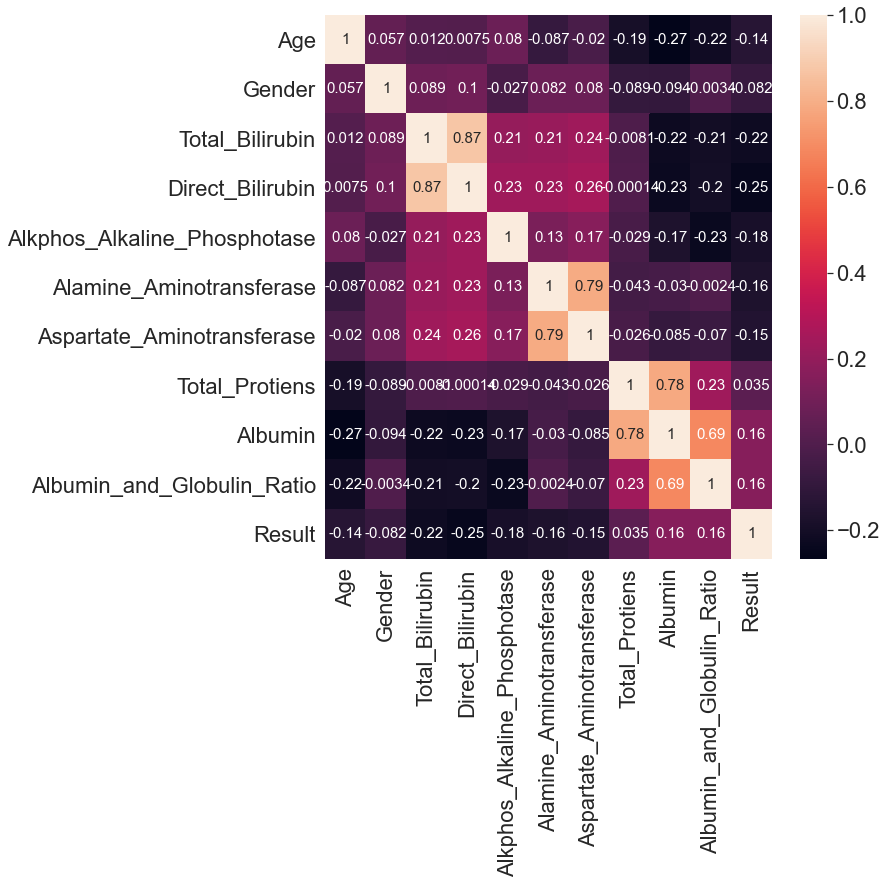

In [32]:
from matplotlib.pyplot import rcParams
sb.heatmap(df.corr(), annot = True, annot_kws = {'size':15})
sb.set(font_scale = 1.5)
rcParams['figure.figsize']=(10,10)

In [33]:
df.corr().Result

Age                            -0.137351
Gender                         -0.082416
Total_Bilirubin                -0.220208
Direct_Bilirubin               -0.246046
Alkphos_Alkaline_Phosphotase   -0.184866
Alamine_Aminotransferase       -0.163416
Aspartate_Aminotransferase     -0.151934
Total_Protiens                  0.035008
Albumin                         0.161388
Albumin_and_Globulin_Ratio      0.162319
Result                          1.000000
Name: Result, dtype: float64

#### Comparing to the boxplots, feature selection and heatmap we can clearly see that we can drop the features like, Direct_Bilirubin, Alamine_Aminotransferase & Albumin_and_Globulin_Ratio

In [34]:
x1 = x_scale.drop(['Direct_Bilirubin', 'Alamine_Aminotransferase', 'Albumin_and_Globulin_Ratio'], axis = 1)
x1.head()

,Age,Gender,Total_Bilirubin,Alkphos_Alkaline_Phosphotase,Aspartate_Aminotransferase,Total_Protiens,Albumin
0,0.709302,0.0,0.004021,0.060576,0.001626,0.594203,0.521739
1,0.674419,1.0,0.140751,0.310699,0.018296,0.695652,0.500000
2,0.674419,1.0,0.092493,0.208598,0.011791,0.623188,0.521739
3,0.627907,1.0,0.008043,0.058134,0.002033,0.594203,0.543478
4,0.790698,1.0,0.046917,0.064485,0.009961,0.666667,0.326087


In [35]:
x1.shape

(583, 7)

## Data Balancing

In [36]:
y.value_counts()

1    416
2    167
Name: Result, dtype: int64

### The dataset is imbalanced

### We use Oversampling method (SMOTE) for data balancing

In [37]:
from imblearn.over_sampling import SMOTE

os = SMOTE()

x_smote, y_smote = os.fit_resample(x1, y)

In [38]:
x_smote.head()     # scaled values with selected features

,Age,Gender,Total_Bilirubin,Alkphos_Alkaline_Phosphotase,Aspartate_Aminotransferase,Total_Protiens,Albumin
0,0.709302,0.0,0.004021,0.060576,0.001626,0.594203,0.521739
1,0.674419,1.0,0.140751,0.310699,0.018296,0.695652,0.500000
2,0.674419,1.0,0.092493,0.208598,0.011791,0.623188,0.521739
3,0.627907,1.0,0.008043,0.058134,0.002033,0.594203,0.543478
4,0.790698,1.0,0.046917,0.064485,0.009961,0.666667,0.326087


In [39]:
print('Shape of the predictors & target after Balancing and Feature Scaling are :')
print('X : ', x_smote.shape)
print('Y :', y_smote.shape)

Shape of the predictors & target after Balancing and Feature Scaling are :
X :  (832, 7)
Y : (832,)


# Train Test Split

In [40]:
# Train Test Split

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 10)

In [41]:
print('x_train =', x_train.shape)
print('x_test =', x_test.shape)
print('y_train =', y_train.shape)
print('y_test =', y_test.shape)

x_train = (665, 7)
x_test = (167, 7)
y_train = (665,)
y_test = (167,)


# Model Selection

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [43]:
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)

0.6946107784431138

In [44]:
y_predict1=model.predict(x_train)
accuracy_score(y_train,y_predict1)

0.6676691729323309

In [45]:
pd.crosstab(y_test, y_predict)

col_0,1,2
Result,,
1,50,38
2,13,66


In [46]:
print(classification_report(y_test, y_predict))
print(classification_report(y_train, y_predict1))

              precision    recall  f1-score   support

           1       0.79      0.57      0.66        88
           2       0.63      0.84      0.72        79

    accuracy                           0.69       167
   macro avg       0.71      0.70      0.69       167
weighted avg       0.72      0.69      0.69       167

              precision    recall  f1-score   support

           1       0.69      0.58      0.63       328
           2       0.65      0.75      0.70       337

    accuracy                           0.67       665
   macro avg       0.67      0.67      0.66       665
weighted avg       0.67      0.67      0.67       665



# Naive Bayes

In [47]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()   
model.fit(x_train, y_train)

BernoulliNB()

In [48]:
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)

0.5808383233532934

In [49]:
y_predict1=model.predict(x_train)
accuracy_score(y_train,y_predict1)

0.544360902255639

# KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=8)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [51]:
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)

0.6646706586826348

In [52]:
y_predict1=model.predict(x_train)
accuracy_score(y_train,y_predict1)

0.7669172932330827

# SVM

In [53]:
params = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1.0, 25.0, 50.0, 100, 150],
    'gamma': [0.01, 0.1, 1.0, 10.0, 20.0]
}

# Checks 2x6x5 = 60 combinations

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(SVC(), param_grid=params, verbose=2)  # GridSearchCV helps show all the combinations
gscv.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

[CV] END .....................C=25.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=25.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=25.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=25.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..................C=25.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=25.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=25.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=25.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=25.0, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ......................C=25.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=25.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=25.0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 25.0, 50.0, 100, 150],
                         'gamma': [0.01, 0.1, 1.0, 10.0, 20.0],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [55]:
gscv.best_params_

{'C': 50.0, 'gamma': 20.0, 'kernel': 'rbf'}

In [56]:
gscv.best_score_

0.7624060150375941

In [57]:
model=SVC(C = 50, gamma = 20, kernel='rbf')  # using the params we get from the best params
model.fit(x_train, y_train)

SVC(C=50, gamma=20)

In [58]:
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)

0.7724550898203593

In [59]:
y_predict1=model.predict(x_train)
accuracy_score(y_train,y_predict1)

0.9187969924812031

# Random Forest

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 1)

In [61]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, criterion='gini', random_state = 1)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [62]:
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)

0.7544910179640718

In [63]:
y_predict1=model.predict(x_train)
accuracy_score(y_train,y_predict1)

0.9954887218045113

In [64]:
print('Parameters currently in use :\n')
print(model.get_params())

Parameters currently in use :

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


## Hyperparameter Tuning using GrisdSearchCV in RF

In [65]:
param = {
    'bootstrap' : ['True', 'False'],
    'n_jobs' : [-1, 1],
    'max_features' : ['auto', 'sqrt'],
    'max_depth': [5, 10],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [10, 50, 100],
    'random_state' : [2,10,40,100]
}

# 2*2*2*2*3*2*3*5 = 1152 Combinations

In [66]:
gscv = GridSearchCV(estimator = model, param_grid = param, cv = 3, verbose = 2)  # GridSearchCV helps show all the combinations
gscv.fit(x_train, y_train)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=2; total time=  20.9s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=-1, ra

[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstrap=Tru

[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=100; total time=   0.1s
[CV] END bootstrap=

[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=2; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=40; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=40; total time=   0.2s
[CV] END bootstrap=True, max_

[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=100; total time=   0.1s
[CV] END bootstrap=True, 

[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_de

[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstrap=Tru

[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.2s
[CV] END boot

[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=10; total time=   0.1s
[CV] END bootstrap=True, max_dept

[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, ma

[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=40; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=40; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=2; total time=   0.0s
[CV] END bootstrap=Tr

[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=2; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=2; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=2; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=10; total time=   0.2s
[CV] END bootstrap=True, ma

[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=40; total time=   0.9s
[CV] END bootstrap=True,

[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=2; total time=   0.0s
[CV] END bootstrap=True, ma

[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=2; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=2; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=2; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=10; total time=   0.2s
[CV] END bootstrap=True, ma

[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=40; total time=   0.1s
[CV] END bootstrap=True, max_d

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, ma

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=40; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=40; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=2; total time=   0.0s
[CV] END bootstrap=

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=2; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=2; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=2; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=10; total time=   0.2s
[CV] END bootst

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=40; total time=   0.1s
[CV] END bootstrap=True

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=2; total time=   0.0s
[CV] END bootst

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=2; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=2; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=2; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=10; total time=   0.3s
[CV] END bootst

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=40; total time=   0.1s
[CV] END bootstrap=True, max_

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=10; total time=   0.0s
[CV] END bootstrap=True

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=2; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstra

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=100; total time=   0.1s
[CV] END boot

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=10; total time=   0.0s
[CV] END bootstrap=True, max_

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=2; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=40; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=40; total time=   0.3s
[CV] END bootstrap=True

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=100; total time=   0.1s
[CV] END bootstrap=

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=True, 

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstr

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.2s
[CV] EN

[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=10; total time=   0.1s
[CV] END bootstrap=False, m

[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=Fa

[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=2; total time=   0.0s
[CV] END bootst

[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=10; total time=   0.2s
[CV] END bootstrap=Fa

[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=40; total time=   0.1s
[CV] END bootstrap

[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstrap=Fal

[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.3s
[CV] END boot

[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=10; total time=   0.1s
[CV] END bootstrap=Fa

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=False, m

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=2; total time=   0.0s
[CV] END bootstrap=

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=10; total time=   0.2s
[CV] END bootst

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=40; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=40; total time=   0.1s
[CV] END bootstrap=Fals

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=2; total time=   0.0s
[CV] END bootst

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=10; total time=   0.2s
[CV] END bootst

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=40; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=40; total time=   0.1s
[CV] END bootstrap=False, max

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=10; total time=   0.0s
[CV] END bootstrap

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=10; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=10; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=10; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bo

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=40; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=40; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=40; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=100; total time=   0.1s
[CV] END 

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=-1, random_state=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=2; total time=   0.0s
[CV] END bootst

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=2; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=10; total time=   0.3s
[CV] END bootst

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=10; total time=   0.1s
[CV] END bootstrap=

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=Fa

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=40; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=100, n_jobs=1, random_state=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=2; total time=   0.0s
[CV] END boot

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=1, random_state=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=10; total time=   0.3s
[CV] END 

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=10; total time=   0.1s
[CV] END bootstrap=

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=40; total time=   0.0s
[CV] END b

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=10; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100, n_jobs=-1, random_state=100; total time=   0.2s
[C

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=40; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=-1, random_state=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=2; total time=   0.1s
[CV] END bootstra

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=-1, random_state=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=10; total time=   0.0s
[CV] END bootstra

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=10; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=10; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=10; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=40; total time=   0.3s
[CV] END boo

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=40; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=40; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=40; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50, n_jobs=1, random_state=100; total time=   0.1s
[CV] END bootstrap=Fa

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, n_jobs=-1, random_state=2; total time=   0.1s
[CV] END boot

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=1, random_state=100; total time=   0.2s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=10, random_state=1),
             param_grid={'bootstrap': ['True', 'False'], 'max_depth': [5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10],
                         'n_estimators': [10, 50, 100], 'n_jobs': [-1, 1],
                         'random_state': [2, 10, 40, 100]},
             verbose=2)

In [67]:
gscv.best_params_

{'bootstrap': 'True',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 50,
 'n_jobs': -1,
 'random_state': 40}

In [68]:
model = RandomForestClassifier(bootstrap = True, max_depth = 10,
                               max_features = 'auto', min_samples_leaf = 3, min_samples_split = 10,
                               n_estimators= 50, n_jobs = -1, criterion='gini', random_state = 40)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=50, n_jobs=-1, random_state=40)

In [69]:
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)

0.7964071856287425

In [70]:
y_predict1=model.predict(x_train)
accuracy_score(y_train,y_predict1)

0.8947368421052632

- Accuracy is not good

In [71]:
random = {
    'bootstrap' : ['True', 'False'],
    'n_jobs' : [-1, 1],
    'max_features' : ['auto', 'sqrt'],
    'max_depth': [5, 10],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [10, 50, 100],
    'random_state' : [2,10,40,100]
}

# 2*2*2*2*3*2*3*5 = 1152 Combinations

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
rscv = RandomizedSearchCV(estimator = model, param_distributions = param, cv = 3, verbose = 2)  # GridSearchCV helps show all the combinations
rscv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=1, random_state=40; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10, n_jobs=1, 

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    min_samples_leaf=3,
                                                    min_samples_split=10,
                                                    n_estimators=50, n_jobs=-1,
                                                    random_state=40),
                   param_distributions={'bootstrap': ['True', 'False'],
                                        'max_depth': [5, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10],
                                        'n_estimators': [10, 50, 100],
                                        'n_jobs': [-1, 1],
                                        'random_state': [2, 10, 40, 100]},
                   verbose=2)

In [74]:
rscv.best_params_

{'random_state': 100,
 'n_jobs': -1,
 'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': 'False'}

In [75]:
model = RandomForestClassifier(bootstrap = False, max_depth = 10,
                               max_features = 'auto', min_samples_leaf = 4, min_samples_split = 8,
                               n_estimators= 100, n_jobs = -1, criterion='gini', random_state = 100)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=4,
                       min_samples_split=8, n_jobs=-1, random_state=100)

In [76]:
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)

0.7844311377245509

In [77]:
y_predict1=model.predict(x_train)
accuracy_score(y_train,y_predict1)

0.9338345864661655

# Random Forest after Hyperparameter tuning

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 1)

In [79]:
model = RandomForestClassifier(min_samples_split = 2, bootstrap = False,
                               n_estimators= 10, criterion='gini', random_state = 2)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, n_estimators=10, random_state=2)

In [80]:
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)

0.8143712574850299

In [81]:
y_predict1=model.predict(x_train)
accuracy_score(y_train,y_predict1)

1.0

# SVM after tuning

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 8)

In [83]:
model=SVC(C = 100, gamma = 180, kernel='rbf')
model.fit(x_train, y_train)

SVC(C=100, gamma=180)

In [84]:
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)

0.8383233532934131

In [85]:
y_predict1=model.predict(x_train)
accuracy_score(y_train,y_predict1)

1.0

In [86]:
pd.crosstab(y_test, y_predict)

col_0,1,2
Result,,
1,61,11
2,16,79


In [87]:
pd.crosstab(y_train, y_predict1)

col_0,1,2
Result,,
1,344,0
2,0,321


In [88]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.79      0.85      0.82        72
           2       0.88      0.83      0.85        95

    accuracy                           0.84       167
   macro avg       0.83      0.84      0.84       167
weighted avg       0.84      0.84      0.84       167



## XG Boost

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 8)

from xgboost import XGBClassifier
model = XGBClassifier()

model.fit(x_train,y_train)

C:\Users\God\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)

0.8143712574850299

In [91]:
y_predict1=model.predict(x_train)
accuracy_score(y_train,y_predict1)

1.0

## Comparing all the models above we have selected Random Forest, SVM & XG Boost
## So we further tried tuning the hyperparameters for the above 3 models by removing the "Total protiens" column instead of "Alamine_Aminotransferase" for better accuracies